     medianIncome  youthUnemployment2013  unemployment2013  \
0          218334                    7.3               5.5   
1          206737                    8.8               6.3   
2          198482                   13.1               8.9   
3          192114                   10.5               6.6   
4          189118                   11.2               8.9   
5          186336                    9.3               6.1   
6          190409                   11.8               7.2   
7          185343                   12.2               8.2   
8          191829                    9.3               6.1   
9          196154                   11.3               7.4   
10         170971                   14.3               8.3   
11         170559                   10.3               7.2   
12         168796                   11.5              10.2   
13         190597                    9.3               9.1   
14         196841                   14.7               8.6   
15      

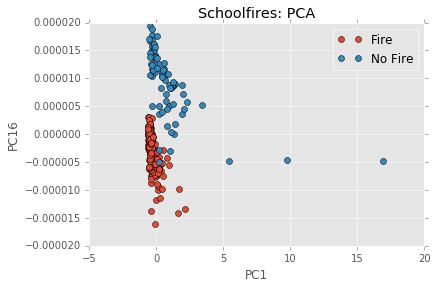

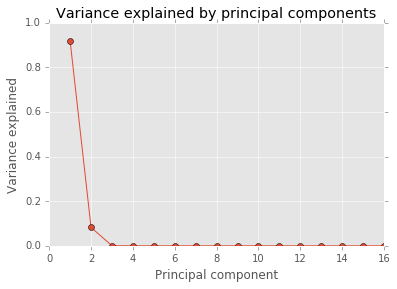

In [71]:
import numpy as np
import pandas as pd
from pylab import *
import scipy.linalg as linalg
from sklearn.decomposition import PCA
#from pivottablejs import pivot_ui
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing 
matplotlib.style.use('ggplot')
%matplotlib inline

#threshhold-binarizing cases
def f(x):
    if x > 0:
        return 1
    else:
        return 0
featurelist =['reportedCrimeVandalism','unemploymentChange','medianIncome',
     'refugees','population','reportedCrime', 'Cases']

featureremovelist = ['governing','municipalityTypeBroad','municipalityType',
               'satisfactionInfluence','satisfactionGeneral','satisfactionElderlyCare','name',
              'latitude','fokusRanking','unemployment2010','rentalApartments', 'foretagsklimatRanking', 'youthUnemployment2010','longitude','code', 'Municipality', 'Population', 'Year', 'cars','motorcycles','tractors', 'snowmobiles']
data = pd.read_csv("2013_merge.csv")

data = data.drop(featureremovelist, axis=1).dropna()
data['Arson'] = data['Cases'].apply(f)
data = data.drop(['Cases'], axis=1).dropna()
classLabels = featurelist
print data
#print classLabels
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames,range(6)))
y = np.mat(data['Arson']).T #np.mat([classDict[value] for value in classLabels]).T
#print y
#pca = PCA(n_components=6)
X = array(data)

N = len(y)
M = len(featurelist)
C = len(classNames)
print X.shape
Y = (X - np.ones((N,1))*X.mean(0))/X.std()
#pca.fit(Y)
#pca.fit(Y)
U,S,V = linalg.svd(Y,full_matrices=False)
#print S
#print V
# Compute variance explained by principal components


V = mat(V).T

# Project the centered data onto principal component space
Z = Y * V


# Indices of the principal components to be plotted
i = 0
j = 15

# Plot PCA of the data
f = figure()
f.hold()
title('Schoolfires: PCA')
Z = array(Z)
for c in [0,1]:
    # select indices belonging to class c:
    class_mask = y.A.ravel()==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o')
legend(["Fire","No Fire"])
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

rho = (S*S) / (S*S).sum() 

figure()
plot(range(1,len(rho)+1),rho,'o-')
title('Variance explained by principal components');
xlabel('Principal component');
ylabel('Variance explained');
show()
#data['Cases'].plot()
#plt.show()
#print pd.DataFrame(pca.components_)

In [ ]:
firelist = list()
mean_list = list()
sata = data.loc[:1998]
#firelist.append(round(data.where(data['Year'] == i)['Cases'].dropna().var(),2))
firelist.append(data.where(data['Year'] == 2000)['Cases'])
#mean_list.append(round(data.where(data['Year'] == 1998)['Cases'].dropna().mean(),2))
#mean_list
sata 